In [39]:
# Description: This strategy is based on technical indicator 'Moving Average Convergence Divergence (MACD)'
# Appliction method: When the MACD line crosses above the signal line, and when MACD is above 0,
# the code generates a buy signal and when MACD crosses below, generates a sell signal

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('TATAMOTORS_NSE_5Y.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-17,263.350006,264.100006,259.649994,260.250000,259.441406,9461420
1,2018-09-18,257.750000,259.799988,250.600006,251.500000,250.718582,11554420
2,2018-09-19,253.550003,255.000000,251.000000,252.600006,251.815170,7845650
3,2018-09-21,255.050003,257.700012,228.850006,250.350006,249.572159,18547453
4,2018-09-24,250.199997,251.000000,239.350006,240.199997,239.453690,8889259
...,...,...,...,...,...,...,...
1231,2023-09-11,634.650024,635.400024,630.500000,634.849976,634.849976,8780510
1232,2023-09-12,638.000000,639.000000,615.250000,620.799988,620.799988,12541377
1233,2023-09-13,621.000000,628.500000,619.549988,625.900024,625.900024,6988358
1234,2023-09-14,628.099976,630.799988,623.299988,624.599976,624.599976,5722295


In [42]:
# Constructing the MACD indicator 

df['12EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12EMA'] - df['26EMA']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


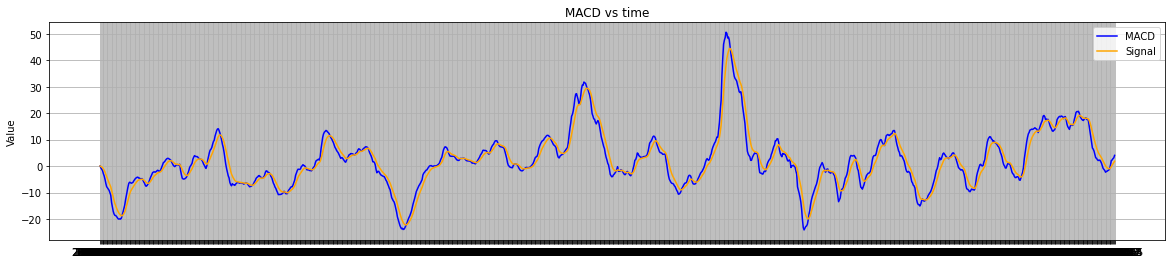

In [43]:
# plotting MACD for visualisation

plt.figure(figsize=(20,4))
plt.plot(df['Date'], df['MACD'], color='blue', label='MACD')
plt.plot(df['Date'], df['Signal'], color='orange', label='Signal')
plt.ylabel('Value')
plt.title('MACD vs time')
plt.grid(True)
plt.legend()


In [53]:
# Generating buy and sell signals based on the strategy

df['Trade'] = np.where((df['MACD'] > df['Signal']) & (df['MACD'] > 0), 1, 0)
df['Position'] = df['Trade'].diff()
df['Buy'] = np.where(df['Position'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where((df['Position'] == -1) | ((df.index == len(df)-1) & (df['Trade'] == 1)), df['Close'], np.NAN)

In [54]:
# Trading Data

Buy_Trades = df['Buy'].dropna().reset_index(drop=True)
Sell_Trades = df['Sell'].dropna().reset_index(drop=True)
Trades = pd.DataFrame({'Buy': Buy_Trades, 'Sell': Sell_Trades})
Trades['Win/Lose'] = np.where(Trades['Sell'] > Trades['Buy'], 1, 0)
Trades

,Buy,Sell,Win/Lose
0,183.050003,175.399994,0
1,182.850006,150.699997,0
2,177.350006,182.250000,1
3,202.949997,215.600006,1
4,127.900002,119.900002,0
5,139.500000,167.050003,1
6,176.699997,176.149994,0
7,183.699997,182.550003,0
8,192.000000,191.399994,0
9,87.199997,80.650002,0


In [55]:
# Statistics

time_frame_yrs = len(df) / 252
avg_share_price = np.mean(df['Close'])
profit_per_share = np.sum(df['Sell']) - np.sum(df['Buy'])
returns = profit_per_share / avg_share_price
cagr = (returns + 1) ** (1 / time_frame_yrs) - 1
avg_annual_returns = cagr * 100
win_percent = (np.sum(Trades['Win/Lose']) / len(Trades))*100
lose_percent = 100 - win_percent

In [56]:
avg_share_price

300.2190132694175

In [57]:
profit_per_share

362.0499600000021

In [58]:
cagr

0.17504256110541627

In [59]:
avg_annual_returns

17.504256110541625

In [60]:
win_percent

50.0

In [61]:
lose_percent

50.0